### **IONOSPHERE Dataset classification using SVM, MLP and Random Forest classifier**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

url = 'https://raw.githubusercontent.com/Aqeel-0/phone.html/master/ionosphere_data.csv'
df = pd.read_csv(url)
df.head()
#column_names = list(df.columns.values)

### **Pre Preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, 0:-1]
y = df.iloc[: , -1]
le = LabelEncoder()
encoded = le.fit_transform(df['column_ai'])
df.drop("column_ai", axis=1, inplace=True)
df["column_ai"] = encoded
y = df["column_ai"]
dict_svm = {}
dict_mlp = {}
dict_rfr = {}
RocAucSvm = {}
RocAucMlp = {}
RocAucRfr = {}
y.info(), X.info()
y.value_counts()


### **Used for ploting confusion matrix**

In [ ]:
def plot(y_test, y_pred):
  from sklearn.metrics import confusion_matrix  
  import seaborn as sns
  
  print("Confusion Matrix : ")
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True Pos','False Pos','False Neg','True neg']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()
  print("**********************************************")


In [ ]:
def reports(y_test, y_pred):
  from sklearn.metrics import classification_report, confusion_matrix
  plot(y_test, y_pred)
  print("**********************************************")
  print("Classification Evaluation : ")
  print(classification_report(y_test, y_pred, zero_division = 0))

### **SVM CLASSIFIER**

In [ ]:
def SVMClassifier(split, kernalValue = 'rbf', degreeValue = 3, gammaValue = 'scale', maxIter = -1):
  from sklearn.model_selection import train_test_split
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  scaler.fit_transform(X_train)
  scaler.transform(X_test)
  classifier = SVC(kernel = kernalValue, degree = degreeValue, gamma = gammaValue, max_iter = maxIter)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if str(split) in dict_svm:
    if dict_svm[str(split)][0] < accuracy:
      dict_svm[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3' and accuracy > dict_svm[str(split)][0]:
      RocAucSvm['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_svm[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3':
      RocAucSvm['max'] = {'y_test': y_test, 'y_pred': y_pred}
  reports(y_test, y_pred)



In [ ]:
#Train - Test split 70-30
SVMClassifier(0.3, 'rbf', 3, 0.42)
SVMClassifier(0.3, 'linear', 3, 0.1)
SVMClassifier(0.3, 'poly', 5, )
SVMClassifier(0.3, 'sigmoid',3, 0.01)

In [ ]:
#Train - Test split 60-40
SVMClassifier(0.4, 'rbf', 3, 0.31)
SVMClassifier(0.4, 'linear', 3, 0.01)
SVMClassifier(0.4, 'poly', 5, )
SVMClassifier(0.4, 'sigmoid', 3, 0.01)

In [ ]:
#Train - Test split 50-50
SVMClassifier(0.5, 'rbf', 3, 0.18)
SVMClassifier(0.5, 'linear', 3, )
SVMClassifier(0.5, 'poly', 4, )
SVMClassifier(0.5, 'sigmoid', 3, 0.09 ) #wrost performance

In [ ]:
#Train - Test split 40-60
SVMClassifier(0.6, 'rbf', 3, 0.51)
SVMClassifier(0.6, 'linear', 3, )
SVMClassifier(0.6, 'poly', 2, 0.14)
SVMClassifier(0.6, 'sigmoid', 3,) #wrost performance

In [ ]:
#Train - Test split 30-70
SVMClassifier(0.7, 'rbf', 3, 0.64)
SVMClassifier(0.7, 'linear')
SVMClassifier(0.7, 'poly', 2,)
SVMClassifier(0.7, 'sigmoid' ) #wrost performance

### **split vs accuracy graph**

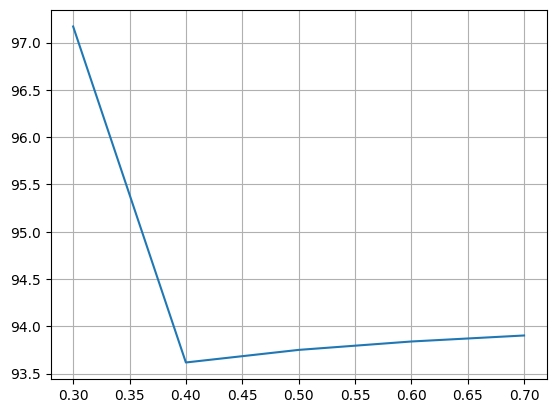

In [83]:
keys = dict_svm.keys()
y_points = []
for key in keys:
  y_points.append(dict_svm[key][0]*100)
x_points = [float(key) for key in dict_svm.keys()]

plt.plot(x_points, y_points)
plt.grid(True)
plt.show()


### **MLP Classifier**

In [ ]:
def MLPClassifier(split, hiddenLayerSize = [100, ], activationValue = 'relu', solverValue = 'adam'):
  from sklearn.model_selection import train_test_split
  from sklearn.neural_network import MLPClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  scaler.fit_transform(X_train)
  scaler.transform(X_test)
  classifier = MLPClassifier(hidden_layer_sizes = hiddenLayerSize, activation = activationValue, solver = solverValue, random_state = 1)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if str(split) in dict_mlp:
    if dict_mlp[str(split)][0] < accuracy:
      dict_mlp[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3' and accuracy > dict_mlp[str(split)][0]:
      RocAucMlp['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_mlp[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3':
      RocAucMlp['max'] = {'y_test': y_test, 'y_pred': y_pred}
  
  reports(y_test, y_pred)

In [ ]:
#Train - Test split 70-30
MLPClassifier(0.3, [80, 20])

In [ ]:
#Train - Test split 60-40
MLPClassifier(0.4, [80, 15])

In [ ]:
#Train - Test split 50-50
MLPClassifier(0.5, [80, 15])

In [ ]:
#Train - Test split 40-60
MLPClassifier(0.6, [80, 46])

In [ ]:
#Train - Test split 30-70
MLPClassifier(0.7, [50, 22])

### **split vs accuracy graph**

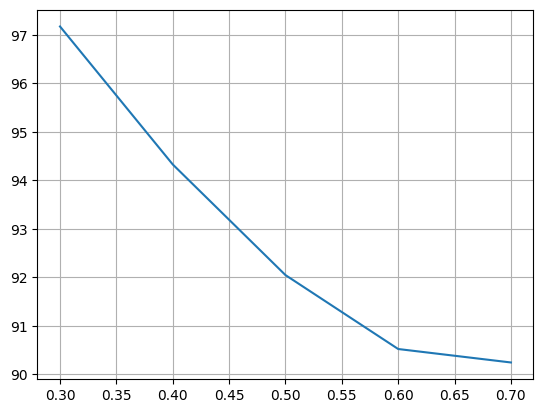

In [82]:
keys = dict_mlp.keys()
y_points = []
for key in keys:
  y_points.append(dict_mlp[key][0]*100)
x_points = [float(key) for key in dict_mlp.keys()]

plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

In [ ]:
def randomForest(split, estimator = 100, criterionValue = 'gini', ):
  from sklearn.model_selection import train_test_split
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  scaler.fit_transform(X_train)
  scaler.transform(X_test)
  classifier = RandomForestClassifier(n_estimators = estimator, criterion = criterionValue)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if str(split) in dict_rfr:
    if dict_rfr[str(split)][0] < accuracy:
      dict_rfr[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3' and accuracy > dict_rfr[str(split)][0]:
      RocAucRfr['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_rfr[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3':
      RocAucRfr['max'] = {'y_test': y_test, 'y_pred': y_pred}

  reports(y_test, y_pred)


In [ ]:
randomForest(0.3, 170)
randomForest(0.3, 205, 'entropy')

In [ ]:
randomForest(0.4, 70)
randomForest(0.4, 80, 'entropy')

In [ ]:
randomForest(0.5, 66)
randomForest(0.5, 140, 'entropy')

In [ ]:
randomForest(0.6, )
randomForest(0.6, 100, 'entropy')

In [ ]:
randomForest(0.7, 120)
randomForest(0.4, 80, 'entropy')

### **split vs accuracy graph**

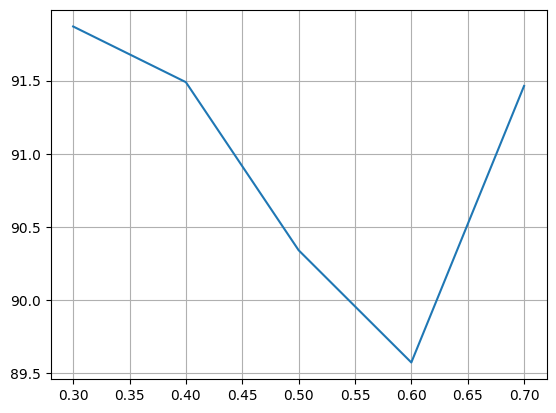

In [81]:
keys = dict_rfr.keys()
y_points = []
for key in keys:
  y_points.append(dict_rfr[key][0]*100)
x_points = [float(key) for key in dict_rfr.keys()]

plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **ROC curve and ROC_AUC score for all the classifier having maximum accuracy when train test split 70-30.**

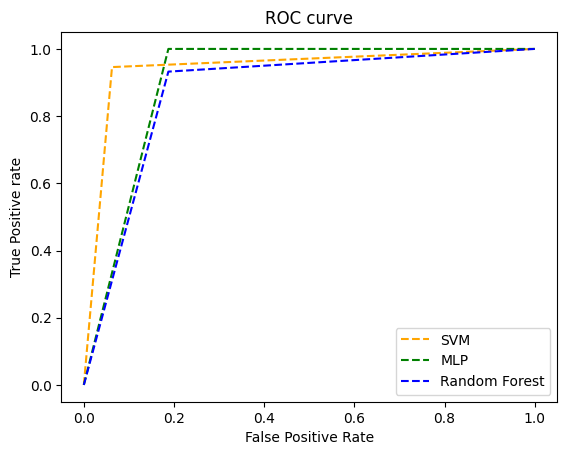

In [80]:
from sklearn import metrics
def auc_roc():
    fpr1, tpr1, _1 = metrics.roc_curve(RocAucSvm['max']['y_test'], RocAucSvm['max']['y_pred'], pos_label=1)
    fpr2, tpr2, _2 = metrics.roc_curve(RocAucMlp['max']['y_test'], RocAucMlp['max']['y_pred'], pos_label=1)
    fpr3, tpr3, _3 = metrics.roc_curve(RocAucRfr['max']['y_test'], RocAucRfr['max']['y_pred'], pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM')
    plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MLP')
    plt.plot(fpr3, tpr3, linestyle='--', color='blue', label= 'Random Forest')
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show()
auc_roc()

### Using PCA on Random Forest Classifiers

In [ ]:
# Standardizing the data (ionosphere dataset is already standardized)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
print(X_std)


# Performing PCA
from sklearn.decomposition import PCA

number_of_components = 10  # Number of components to retain (your choice)
pca = PCA(n_components=number_of_components)
transformed_data = pca.fit_transform(X)
print(transformed_data.shape)

## choose train-test split or hyperparameters accordingly
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.7, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, criterion='gini')  # most suitable hyperparameters
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
if dict_rfr[str(0.3)][0] < accuracy:
      dict_rfr[str(0.3)] = [accuracy, y_test, y_pred]
print('--------------------------------------------------------------------------------')
print(
  'Classification report of Random Forest Classifier after PCA (' + str(number_of_components) + ' components taken):  ')
print('--------------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

print("Confusion Matrix for the same: ")
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Pos', 'False Pos', 'False Neg', 'True neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 4))
print(sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Benign', 'Malignant'],
                  yticklabels=['Benign', 'Malignant']))

### Using PCA on Support Vector Machines

In [ ]:
# Performing PCA
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
number_of_components = 12  # Number of components to retain (your choice)
pca = PCA(n_components=number_of_components)
transformed_data = pca.fit_transform(X)
print(transformed_data.shape)

## choose train-test split or hyperparameters accordingly
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.3, random_state=42)
rfc = SVC(gamma='scale', kernel='rbf', degree=3)  # most suitable hyperparameters
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
if dict_svm[str(0.3)][0] < accuracy:
      dict_svm[str(0.3)] = [accuracy, y_test, y_pred]
print('--------------------------------------------------------------------------------')
print(
  'Classification report of Support Vector Machines Classifier after PCA (' + str(number_of_components) + ' components taken):  ')
print('--------------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

print("Confusion Matrix for the same: ")
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Pos', 'False Pos', 'False Neg', 'True neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 4))
print(sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Benign', 'Malignant'],
                  yticklabels=['Benign', 'Malignant']))

### Using PCA on Multi Layer Perceptron

In [ ]:
# Performing PCA
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score  
number_of_components = 12  # Number of components to retain (your choice)
pca = PCA(n_components=number_of_components)
transformed_data = pca.fit_transform(X)
print(transformed_data.shape)

## choose train-test split or hyperparameters accordingly
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.3, random_state=42)
rfc = SVC(gamma='scale', kernel='rbf', degree=3)  # most suitable hyperparameters
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
if dict_mlp[str(0.3)][0] < accuracy:
      dict_mlp[str(0.3)] = [accuracy, y_test, y_pred]
print('--------------------------------------------------------------------------------')
print(
  'Classification report of Multi Layer Perceptron Classifier after PCA (' + str(number_of_components) + ' components taken):  ')
print('--------------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

print("Confusion Matrix for the same: ")
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Pos', 'False Pos', 'False Neg', 'True neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 4))
print(sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Benign', 'Malignant'],
                  yticklabels=['Benign', 'Malignant']))

Confusion Matrix : 


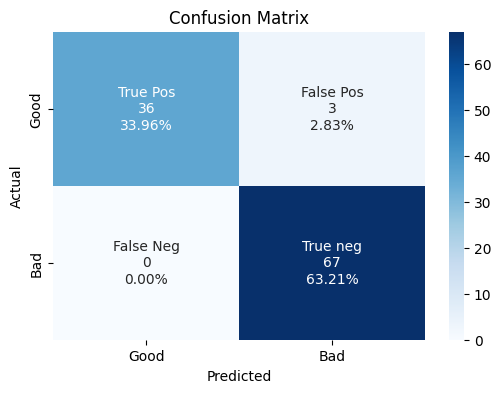

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        39
           1       0.96      1.00      0.98        67

    accuracy                           0.97       106
   macro avg       0.98      0.96      0.97       106
weighted avg       0.97      0.97      0.97       106



In [79]:
#Best result for svm classifier
maxi=0
y_test = []
y_pred = []
for key in dict_svm:
  if maxi < 100*dict_svm[key][0]:
    maxi = 100*dict_svm[key][0]
    y_test = dict_svm[key][1]
    y_pred = dict_svm[key][2]
reports(y_test, y_pred)


Confusion Matrix : 


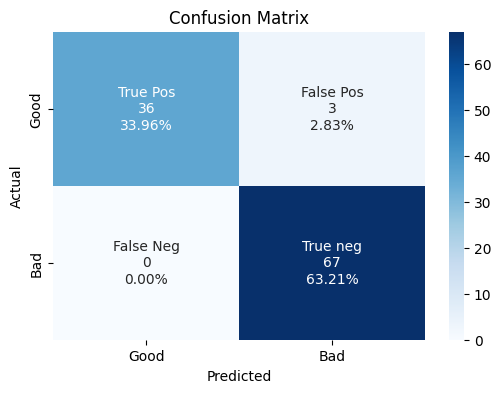

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        39
           1       0.96      1.00      0.98        67

    accuracy                           0.97       106
   macro avg       0.98      0.96      0.97       106
weighted avg       0.97      0.97      0.97       106



In [78]:
#Best result for mlp classifier
maxi=0
y_test = []
y_pred = []
for key in dict_mlp:
  if maxi < 100*dict_mlp[key][0]:
    maxi = 100*dict_mlp[key][0]
    y_test = dict_mlp[key][1]
    y_pred = dict_mlp[key][2]
reports(y_test, y_pred)


Confusion Matrix : 


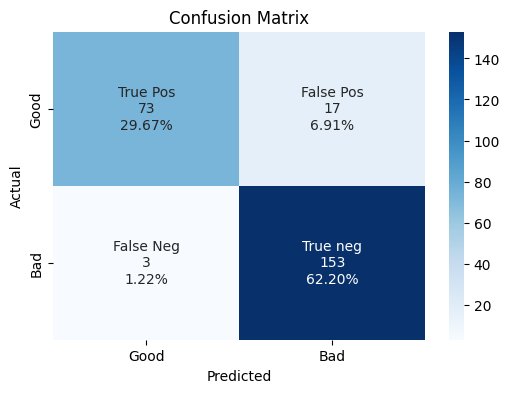

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        90
           1       0.90      0.98      0.94       156

    accuracy                           0.92       246
   macro avg       0.93      0.90      0.91       246
weighted avg       0.92      0.92      0.92       246



In [77]:
#Best result for random forest classifier
maxi=0
y_test = []
y_pred = []
for key in dict_rfr:
  if maxi < 100*dict_rfr[key][0]:
    maxi = 100*dict_rfr[key][0]
    y_test = dict_rfr[key][1]
    y_pred = dict_rfr[key][2]
reports(y_test, y_pred)
